<a href="https://colab.research.google.com/github/evaldoflorestal/TipologiaFlorestal/blob/main/Tipologia_Florestal_VersaoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUÇÃO#


Neste trabalho, realizaremos uma análise do inventário florestal realizado em uma floresta nativa com o objetivo de classificar a ocorrência das espécies no presente levantamento para que os relatórios gerados, possam servir de base ao Engenheiro Florestal, para classificar a vegetação levantada de acordo com a lei e atendimento ao termo de referência exigido pela Secretaria de Estado de Meio Ambiente (SEMA-MT).

O presente trabalho foi conduzido primeiramente com dados levantados em campo em vegetação primeiramente caracterizada como Cerrado em uma propriedade localizada em Mato Grosso. Foram estabelecidas um total de 10 (dez) parcelas permanentes, equidistantes entre si (200m) e distantes a 100m das estradas, com dimensões de 10m x 100m (1000 m²) cada uma, totalizando uma área amostrada de 1 hectare. Essa configuração atende às exigências estipuladas no termo de referência para Tipologia da Secretaria Estadual de Meio Ambiente - SEMA-MT.

#OBJETIVO#

O objetivo principal deste trabalho é realizar uma análise mais ágil e eficiente do inventário florestal, utilizando o Python e suas bibliotecas.



#CONSIDERAÇÕES INICIAIS SOBRE O ALGORITMO#

Considerando que atualmente, as análises demandam tempo e muitas delas exigem o retorno do profissional a campo, espera-se que este trabalho sirva como uma ferramenta para agilizar os levantamentos futuros, atendendo aos parâmetros estatísticos requeridos para fins de licenciamento ainda em campo, uma vez que o algoritimo realiza os calculos necessários e demonstra as principais espécies que mais ocorrem naquele local, possibilitando ao profissional identifica-las e cataloga-las se for necessário.

Contudo, para essa finalidade, se faz necessário utilizar uma planilha eletronica (Tablet) e posteriormente inserir os dados em um computador (notebook).

#Nota importante:#
É necessário inserir informações corretamente em planilha.

**Não inserir espaços adicionais para a mesma espécie**, seja no inicio ou final, evitar usar caixa alta e outra baixa para a mesma espécie. O algoritmo é "sensitive case" - quando um programa diferencia caracteres maiúsculos de minúsculos. Com isso evita-se de classificar duas ou mais vezes a mesma espécie.

Importante destacar aqui, que embora não exigir parâmetros estatísticos, o algoritmo é capaz de realizar e apresentar as informações que até então eram feitas também em escritório, tais como: erro de amostragem, variância, coeficiente de variação, número ideal e admissível de parcelas necessárias e entre outros.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#INTRODUZINDO PLANILHA DE CAMPO#

In [2]:
tipologia = pd.read_excel('/content/Planilhadecampo.xlsx')
tipologia

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA
0,1,9127,Vochysiaceae,Vochysia rufa Mart.,Pau doce,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00000,3.0
1,1,9128,Vochysiaceae,Vochysia rufa Mart.,Pau doce,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.00000,3.0
2,1,9129,Vochysiaceae,Vochysia rufa Mart.,Pau doce,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00000,3.0
3,1,9130,Vochysiaceae,Vochysia rufa Mart.,Pau doce,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.00000,4.0
4,1,9131,Malvaceae,Eriotheca gracilipes (K.Schum.) A.Robyns,Paineira do cerrado,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,10,9529,Ebenaceae,Diospyros lasiocalyx (Mart.) B.Walln.,Olho de boi,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00000,4.0
1285,10,9530,NI,NI,NI,21,20.0,21.0,18.0,NaN,NaN,NaN,NaN,40.07493,3.0
1286,10,9531,Malpighiaceae,Byrsonima crassifolia (L.) Kunth,Murici rosa,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00000,3.0
1287,10,9532,Malvaceae,Eriotheca gracilipes (K.Schum.) A.Robyns,Paineira do cerrado,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00000,3.0


#INSERINDO COLUNAS NECESSÁRIAS#

Aqui vamos inserir as colunas necessárias, como Diâmetro a altura do peito (DAP), Area_transversal (Basal) em m², e Volume (m³/ha)

In [3]:
# Calcular a coluna DAP
tipologia['DAP'] = (tipologia['CAP_Calculado']/ np.pi)

# Calcular a coluna 'G1' - Área transversal-Basal
tipologia['G1'] = (tipologia['DAP']**2) * np.pi / 40000

# Calcular a coluna 'Vol_m3_ind'
tipologia['Vol_m3'] = tipologia['G1'] * tipologia['ALTURA'] * 0.7


# Exibir o DataFrame com as novas colunas
display(tipologia)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
0,1,9127,Vochysiaceae,Vochysia rufa Mart.,Pau doce,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00000,3.0,7.639437,0.004584,0.009626
1,1,9128,Vochysiaceae,Vochysia rufa Mart.,Pau doce,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.00000,3.0,7.321127,0.004210,0.008840
2,1,9129,Vochysiaceae,Vochysia rufa Mart.,Pau doce,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00000,3.0,8.594367,0.005801,0.012183
3,1,9130,Vochysiaceae,Vochysia rufa Mart.,Pau doce,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.00000,4.0,11.459156,0.010313,0.028877
4,1,9131,Malvaceae,Eriotheca gracilipes (K.Schum.) A.Robyns,Paineira do cerrado,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00000,3.0,7.957747,0.004974,0.010445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,10,9529,Ebenaceae,Diospyros lasiocalyx (Mart.) B.Walln.,Olho de boi,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00000,4.0,9.549297,0.007162,0.020054
1285,10,9530,NI,NI,NI,21,20.0,21.0,18.0,NaN,NaN,NaN,NaN,40.07493,3.0,12.756246,0.012780,0.026838
1286,10,9531,Malpighiaceae,Byrsonima crassifolia (L.) Kunth,Murici rosa,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00000,3.0,6.366198,0.003183,0.006685
1287,10,9532,Malvaceae,Eriotheca gracilipes (K.Schum.) A.Robyns,Paineira do cerrado,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00000,3.0,5.092958,0.002037,0.004278


#Salvando planilha calculada

Mais abaixo, vamos salvar a planilha calculada em formato xlsx (Excel) para que possa ser utilizado em relatórios e outros documentos.

In [4]:
# Salvar Planilha campo em um arquivo Excel
tipologia.to_excel('Planilha_campo_volumes.xlsx', index=False)

#Contabilizando o n° de linhas

Servirá para fins de monitorar a existência de celulas vazias, possíveis falhas

In [5]:
tipologia.count()

Amostra            1289
Num                1289
Familia            1289
Nome_cientifico    1289
Nome_Popular       1289
CAP                1289
CAP.1               131
CAP.2                22
CAP.3                 5
CAP.4                 0
CAP.5                 0
CAP.6                 0
CAP.7                 0
CAP_Calculado      1289
ALTURA             1289
DAP                1289
G1                 1289
Vol_m3             1289
dtype: int64

#Número de ocorrência de espécies

Abaixo vamos relacionar o número de ocorrência das espécies no inventário florestal. Será criado uma lista em excel de todas as espécies que ocorreram no levantamento, ordenando a que mais ocorre para a que menos ocorre. Sendo assim, com esta planilha teremos o ordenamento das 20 espécies que mais ocorrem, atendendo assim o dispositivo da legislação que solicita essa ocorrência.

In [6]:
ocorrencia_especies = tipologia.drop_duplicates(subset=['Amostra', 'Num', 'Familia', 'Nome_cientifico', 'Nome_Popular'])
num_ocorrencias = ocorrencia_especies['Nome_cientifico'].value_counts().reset_index()
num_ocorrencias.columns = ['Nome_cientifico', 'Ocorrencia']
num_ocorrencias['Indice'] = range(1, len(num_ocorrencias) + 1)

# Buscar as colunas 'Familia' e 'Nome_Popular' correspondentes ao 'Nome_cientifico'
num_ocorrencias = num_ocorrencias.merge(ocorrencia_especies[['Nome_cientifico', 'Familia', 'Nome_Popular']], on='Nome_cientifico', how='left')
num_ocorrencias = num_ocorrencias.drop_duplicates().reset_index(drop=True)

# Salvar em uma tabela Excel
num_ocorrencias.to_excel('ocorrencias.xlsx', index=False)

#Número de individuos total no inventário#

In [7]:
Num_ind_Total = tipologia.Amostra.count()
Num_ind_Total

1289

#Verificação dos dados

No código abaixo, vamos verificar valores médios, minimos e máximos mensurados para fins de observar possíveis erros de anotações.

In [8]:
Altura_media = tipologia['ALTURA'].mean()
print(f'A altura média da população mensurada é: {Altura_media:.3f} metros')

Maior_altura = tipologia['ALTURA'].max()
print(f'A altura máxima encontrada foi: {Maior_altura} metros')

Menor_altura = tipologia['ALTURA'].min()
print(f'A altura mínima encontrada foi: {Menor_altura} metros')

#Agora para DAP
print(' '*20)
print('#'*20)
print(' '*20)

DAP_medio = tipologia['DAP'].mean()
print(f'O DAP médio da população mensurada foi: {DAP_medio:.3f} cm')

DAP_Maior = tipologia['DAP'].max()
print(f'O DAP máximo encontrado foi: {DAP_Maior:.3f} cm')

DAP_Menor = tipologia['DAP'].min()
print(f'O DAP minimo encontrado foi: {DAP_Menor:.3f} cm')


A altura média da população mensurada é: 3.345 metros
A altura máxima encontrada foi: 8.0 metros
A altura mínima encontrada foi: 1.5 metros
                    
####################
                    
O DAP médio da população mensurada foi: 9.445 cm
O DAP máximo encontrado foi: 35.265 cm
O DAP minimo encontrado foi: 4.775 cm


#INVESTIGAÇÃO DE OCORRÊNCIA - VALORES MÁXIMOS E MINIMOS#

Considera-se importante esta parte do nosso código para fins de investigar a ocorrências dos valores máximos e minimos em Alturas e DAP's. Pois com essas informações é possível verificar se existem erros de inserção de dados em planilha de campo e onde elas ocorrerram.

In [9]:
#INVESTIGANDO ALTURA MINIMA

min_altura = tipologia['ALTURA'].min()
linhas_min_altura = tipologia.loc[tipologia['ALTURA'] == min_altura]

display(linhas_min_altura)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
87,1,9214,pau de fumo,pau de fumo,pau de fumo,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1.5,7.002817,0.003852,0.004044
164,2,9291,Celastraceae,Salacia crassifolia (Mart. ex Schult.) G.Don,Bacupari do cerrado,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1.5,6.047888,0.002873,0.003016
280,2,9407,Melastomataceae,Mouriri elliptica Mart.,Coroa de frade,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,1.5,5.729578,0.002578,0.002707
293,2,9420,Vochysiaceae,Qualea multiflora Mart.,Pau terra liso,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1.5,6.366198,0.003183,0.003342
308,3,9435,cabelo de negro,cabelo de negro,cabelo de negro,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.5,5.411268,0.002300,0.002415
322,3,9449,cabelo de negro,cabelo de negro,cabelo de negro,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,1.5,7.639437,0.004584,0.004813
374,3,9502,Chrysobalanaceae,Leptobalanus sclerophyllus (Hook.f.) Sothers &...,Cinzeiro,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1.5,7.957747,0.004974,0.005222
815,7,9060,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.5,4.774648,0.001790,0.001880
851,7,9096,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1.5,7.002817,0.003852,0.004044
889,8,9134,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1.5,6.047888,0.002873,0.003016


In [10]:
#INVESTIGANDO ALTURA MÁXIMA

max_altura = tipologia['ALTURA'].max()
linhas_max_altura = tipologia.loc[tipologia['ALTURA'] == max_altura]

display(linhas_max_altura)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
718,6,9846,Melastomataceae,Mouriri pusa Gardner,Jabuticaba do cerrado,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,8.0,12.095776,0.011491,0.064350
777,7,9022,Metteniusaceae,Emmotum nitens (Benth.) Miers,Sobre,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,8.0,32.467608,0.082792,0.463637
873,7,9118,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,8.0,5.411268,0.002300,0.012879


In [11]:
#INVESTIGANDO DAP MINIMO

min_dap = tipologia['DAP'].min()
linhas_min_dap = tipologia.loc[tipologia['DAP'] == min_dap]

display(linhas_min_dap)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
67,1,9194,Bignoniaceae,Tabebuia aurea (Silva Manso) Benth. & Hook.f. ...,Para-tudo,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
78,1,9205,Vochysiaceae,Qualea grandiflora Mart.,Pau terrão,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
118,1,9245,Calophyllaceae,Kielmeyera rubriflora Cambess.,Pau santinho,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.774648,0.00179,0.003760
126,1,9253,Fabaceae,Stryphnodendron adstringens (Mart.) Coville,Barbatimão,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.774648,0.00179,0.003760
133,1,9260,Vochysiaceae,Qualea parviflora Mart.,Pau terrinha,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.5,4.774648,0.00179,0.003133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10,9455,Ebenaceae,Diospyros lasiocalyx (Mart.) B.Walln.,Olho de boi,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.774648,0.00179,0.003760
1243,10,9488,Malpighiaceae,Byrsonima coccolobifolia Kunth,Murici de porco,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.5,4.774648,0.00179,0.001880
1261,10,9506,Malpighiaceae,Byrsonima coccolobifolia Kunth,Murici de porco,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
1267,10,9512,Ebenaceae,Diospyros lasiocalyx (Mart.) B.Walln.,Olho de boi,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507


In [12]:
#INVESTIGANDO DAP MÁXIMA

max_dap = tipologia['DAP'].max()
linhas_max_dap = tipologia.loc[tipologia['DAP'] == max_dap]

display(linhas_max_dap)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
1027,8,9272,Combretaceae,Terminalia corrugata (Ducke) Gere & Boatwr.,Mirindiba,95,57.0,NaN,NaN,NaN,NaN,NaN,NaN,110.788086,6.0,35.264943,0.097673,0.410228


#ORGANIZAÇÃO DAS OCORRÊNCIAS, SOMATÓRIOS DE DADOS E SUAS MÉDIAS (POR ESPÉCIES)



Na tabela abaixo, apresentamos o número de ocorrência de cada espécie em relação a todo levantamento. Relacionadas por ordem alfabética as mesmas apresentam seus resumos gerais como: médias dos DAP's e Alturas e as Somatórias de áreas basais (G1) e Volume_m³.

In [13]:
# Calcular as médias e somatórias agrupadas pelo 'Nome_cientifico'
agregado = tipologia.groupby('Nome_cientifico').agg({'DAP': 'mean', 'ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Contabilizar a ocorrência de cada 'Nome_cientifico' na coluna 'Amostra'
ocorrencia = tipologia.groupby('Nome_cientifico')['Amostra'].count().reset_index(name='Ocorrencia')

# Combinar os dados de médias e somatórias com a contagem de ocorrências
ocorrencia_especie = agregado.merge(ocorrencia, on='Nome_cientifico')

# Reorganizar as colunas no novo dataframe
ocorrencia_especie = ocorrencia_especie.reindex(columns=['Nome_cientifico', 'Ocorrencia', 'DAP','ALTURA', 'G1', 'Vol_m3'])

# Exibir o novo dataframe
display(ocorrencia_especie)


# Salvar o resultado em um arquivo Excel
ocorrencia_especie.to_excel('Ocorrencias_Especies_Area_Basal.xlsx', index=False)

,Nome_cientifico,Ocorrencia,DAP,ALTURA,G1,Vol_m3
0,Andira vermifuga (Mart.) Benth.,70,12.389454,3.735714,0.997138,3.103090
1,Annona coriacea Mart.,9,7.073553,2.888889,0.040330,0.092199
2,Annona crassiflora Mart.,18,9.001096,3.500000,0.124563,0.335072
3,Aspidosperma macrocarpon Mart. & Zucc.,2,7.002817,2.750000,0.007846,0.015472
4,Astronium fraxinifolium Schott,1,5.411268,3.000000,0.002300,0.004830
...,...,...,...,...,...,...
64,cabelo de negro,14,6.627441,2.071429,0.049991,0.075209
65,falso quina,1,7.321127,3.000000,0.004210,0.008840
66,pau de fumo,4,8.538794,2.375000,0.024454,0.045505
67,perobinha,9,12.273046,3.666667,0.113732,0.316355


Nesta parte separamos o número de ocorrência das espécies dentro das parcelas, com seus respectivos valores médios  (DAP e ALTURA) e somatórios (G1 e Vol_m3). As espécies seguem em ordem alfabéticas.

In [14]:
# Agrupar o dataframe pelo campo 'Nome_cientifico' e calcular as médias e somatórias
ocorrencia_especie_por_amostra = tipologia.groupby(['Amostra','Nome_cientifico']).agg({'Nome_Popular':'count', 'DAP': 'mean','ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Renomear a coluna 'Nome_Popular' para 'Ocorrencia'
ocorrencia_especie_por_amostra = ocorrencia_especie_por_amostra.rename(columns={'Nome_Popular': 'Ocorrencia'})

# Exibir o novo dataframe
display(ocorrencia_especie_por_amostra)

,Amostra,Nome_cientifico,Ocorrencia,DAP,ALTURA,G1,Vol_m3
0,1,Annona coriacea Mart.,2,8.594367,3.250000,0.011666,0.026841
1,1,Dimorphandra mollis Benth.,1,7.002817,3.000000,0.003852,0.008088
2,1,Eriotheca gracilipes (K.Schum.) A.Robyns,1,7.957747,3.000000,0.004974,0.010445
3,1,Kielmeyera rubriflora Cambess.,6,7.957747,2.750000,0.034648,0.070329
4,1,Mezilaurus crassiramea (Meisn.) Taub. ex Mez,1,24.509861,5.000000,0.047181,0.165135
...,...,...,...,...,...,...,...
149,10,Couepia sp.,1,9.296611,3.000000,0.006788,0.014255
150,10,Diospyros lasiocalyx (Mart.) B.Walln.,13,10.040142,3.230769,0.132687,0.373263
151,10,Eriotheca gracilipes (K.Schum.) A.Robyns,10,7.193803,3.300000,0.043497,0.108019
152,10,NI,2,12.860635,3.000000,0.025982,0.054562


#Tirando a prova de nosso código#

Nessa parte os resultados devem ser iguais ao número de linhas da nossa planilha de campo inicial. Caso tenha alguma divergência, pode ser que existem dados inseridos errados em planilha de campo. Com isso, é importante revisar os dados.

In [15]:
planilha_campo_linhas = tipologia.shape[0]
print(f'A planilha de campo contém: {planilha_campo_linhas} linhas')


linha_amostra = ocorrencia_especie_por_amostra.Ocorrencia.sum()
print(f'O somatório do número de ocorrências das espécies por amostras são: {linha_amostra}')


linha_especie = ocorrencia_especie.Ocorrencia.sum()
print(f'O somatório do número de espécies é: {linha_especie}')

A planilha de campo contém: 1289 linhas
O somatório do número de ocorrências das espécies por amostras são: 1289
O somatório do número de espécies é: 1289


#RESUMO POR AMOSTRA#

Na tabela abaixo, mostramos os resumos médios dos DAP's e Alturas e as Somatórias de áreas basais (G1) e Volume_m³ por Amostra

In [16]:
# Agrupar o DataFrame 'tipologia' por 'Amostra' e calcular médias e somatórios
resumo = tipologia.groupby('Amostra').agg({'DAP': 'mean', 'ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Exibir o DataFrame de resumo
display(resumo)

# Salvar o resultado em um arquivo Excel
resumo.to_excel('Resumo_geral_medias_por_parcela.xlsx', index=False)

,Amostra,DAP,ALTURA,G1,Vol_m3
0,1,8.708965,3.031250,0.968752,2.364160
1,2,9.161997,3.180921,1.240676,3.382684
2,3,9.019281,3.138462,1.010475,2.718467
3,4,9.147090,3.251969,0.993429,2.678198
4,5,8.768870,3.257009,0.786854,2.142290
5,6,8.322740,3.494792,0.621651,1.794069
6,7,9.689741,3.686992,1.171484,3.934607
7,8,10.135000,3.488304,1.811510,5.898900
8,9,11.249385,3.612295,1.565050,5.073471
9,10,9.907188,3.380342,1.139756,3.354631


#Verificação Área Basal para fins de Tipologia de acordo com Decreto Estadual 1025/2021 SEMA-MT#

**Toda a vegetação com área basal maior que 22m²/ha será caracterizada como floresta**. A vegetação com área basal maior que 22m²/ha poderá ser considerada como Cerrado, se não ocorrer nenhuma espécie exclusiva de floresta entre as 10 (dez) de maior densidade relativa e que ocorra pelo menos 1 (um) espécie exclusiva de cerrado. O decreto anterior (660/2020) não determinava o número de espécies exclusivas de cerrado, já o decreto em questão (1.025/2021) trás o quantitativo de forma taxativa.

Para áreas com vegetação de área basal até 22m²/ha, a classificação fitofisionômica será baseada na composição floristica, e, nos casos em que as 10 (dez) espécies de maior densidade relativa sejam de ampla ocorrência, deverá aumentar o número de espécies de forma progressiva até 20 (vinte) espécies, com a finalidade de definição da tipologia.


In [17]:
Area_basal = resumo.G1.sum()

if Area_basal <= 22:
  print(f'A área amostrada possui Área Basal menor ou igual à 22m² por hectare, com: {round(Area_basal, 3)} m²/ha')
  #print(f'A área basal é: {round(Area_basal, 3)}')
else:
  print('O levantamento superou Area Basal de 22m² por hectare. Verifique as 10 espécies de maiores densidades relativas e verifique se existe espécies exclusivas de cerrado ou não')


A área amostrada possui Área Basal menor ou igual à 22m² por hectare, com: 11.31 m²/ha


In [18]:
Vol_Total_inventario = resumo.Vol_m3.sum()
display(Vol_Total_inventario)

33.34147613959785

#INSIRA AS INFORMAÇÕES NECESSÁRIAS ABAIXO#

Nesta sessão é importante inserir informações quanto ao tamanho da população (ha) amostrada e as dimensões das amostras (m²). Importante que ao inserir casas decimais, devemos utilizar "ponto".

Exemplo: 62.2

In [19]:
area_populacao = float(input('INSIRA O TAMANHO DA ÁREA POPULAÇÃO EM HECTARES (Utilize ponto para casas decimais): '))

INSIRA O TAMANHO DA ÁREA POPULAÇÃO EM HECTARES (Utilize ponto para casas decimais): 1


In [20]:
area_parcela = float(input('INSIRA O TAMANHO DA PARCELA EM METROS QUADRADOS (Utilize ponto para casas decimais): '))

INSIRA O TAMANHO DA PARCELA EM METROS QUADRADOS (Utilize ponto para casas decimais): 1000


#PARÂMETROS ESTATÍSTICOS DO LEVANTAMENTO#

In [21]:
from scipy.stats import t

In [22]:
#Total de parcelas

Total_parcelas = resumo.shape[0]
Total_parcelas

# Calcular o desvio padrão
desvio_padrao = resumo['Vol_m3'].std()

# Calcular a variância
variancia = np.var(resumo['Vol_m3'], ddof=1)

# Calcular a intensidade de amostra
tamanho_parcela = area_parcela #metros quadrados
area_populacao = area_populacao #em hectare
intensidade_amostra = (area_populacao*10000)/tamanho_parcela
intensidade_amostra

# Calcular o coeficiente de variação
coef_variacao = (desvio_padrao / resumo['Vol_m3'].mean()) * 100

# Calcular o erro padrão da média em metros cúbicos por unidade amostral
erro_padrao_media = desvio_padrao / np.sqrt(resumo.shape[0])


#------------------------------------------------ESCOLHENDO AS PROBABILIDADES E ERROS---------------------------------------------------------------#

# Calcular o erro de amostragem em metros cúbicos por unidade amostral (considerando probabilidade de 95% e erro admissível de 10%)
z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 90%, Erro Admissível: 10%
#z_score = t.ppf(0.95, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 90%
#erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 90%, Erro Admissível: 5%
#z_score = t.ppf(0.95, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 90%
##erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 95%, Erro Admissível: 5%
#z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
#erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#-----------------------------------------------------------------------------------------------------------------------------------------------------#

#Calcular média metros cúbicos por amostra / por hectare e total da população(m³/u.a)
vol_medio_amostra = resumo.Vol_m3.mean()

vol_medio_hectare = (vol_medio_amostra*10000)/tamanho_parcela

vol_total_populacao = intensidade_amostra * vol_medio_amostra

# Calcular o intervalo de confiança em metros cúbicos por amostra
ic_amostra = z_score * (desvio_padrao / np.sqrt(resumo.shape[0]))

# Calcular o intervalo de confiança em metros cúbicos por hectare
ic_hectare = ic_amostra * (Total_parcelas / 10000) * 100  # Convertendo a intensidade de amostra para porcentagem

# Calcular o intervalo de confiança em metros cúbicos
ic_m3 = ic_hectare * 10000

# Calcular o erro de amostragem em metros cúbicos por hectare em porcentagem
erro_amostragem_porcentagem = (erro_amostragem / resumo['Vol_m3'].mean()) * 100

# Calcular o erro de amostragem em metros cúbicos por hectare (considerando probabilidade de 95% e erro admissível de 10%)
z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])

# Calcular o valor de T (T-score)
t_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do T-score para probabilidade de 95%

#Calculando erro de amostragem m³ por hectare
erro_amostragem_m3ha = (t_score*erro_padrao_media*10000)/tamanho_parcela

n_amostras = ((coef_variacao ** 2) * (t_score ** 2)) / ((0.10 ** 2) + (coef_variacao ** 2) * ((t_score ** 2) / Total_parcelas))


intervalo_conf = (t_score) * (intensidade_amostra) * (erro_padrao_media)


# Exibir os resultados

print(f'Área da População: {area_populacao:.1f} hectares')
print(f'Área da Parcela: {tamanho_parcela:.3f} m²')
print(f'Probabilidade (90 a 95%): 95%')
print(f'Erro% Admissível: 10,0%')
print(f'Valor de t Calculado: {t_score:.3f}')
print(f'N: {intensidade_amostra:.2f}')
print(f'Volume Médio (m³/u.a): {vol_medio_amostra:.3f} (m³/u.a)')
print(f'Volume Médio (m³/ha): {vol_medio_hectare:.3f} (m³/ha)')
print(f'Variância: {variancia:.3f} (m³/u.a)²')
print(f'Desvio Padrão: {desvio_padrao:.3f} (m³/ha)²')
print(f'Erro Padrão da Média: {erro_padrao_media:.3f} m³/u.a')
print(f'Erro de Amostragem: {erro_amostragem:.3f} m³/u.a')
print(f'Erro de Amostragem por hectare: {erro_amostragem_m3ha:.3f} /m³/ha')

print(f'Erro de Amostragem (%): {erro_amostragem_porcentagem:.2f}%')

print(f'Coeficiente de Variação: {coef_variacao:.2f}%')
print(f'Volume Total da população (m³): {vol_total_populacao:.3f} m³')
print(f'Número de Amostras para o Erro Admissível: {n_amostras:.0f}')





Área da População: 1.0 hectares
Área da Parcela: 1000.000 m²
Probabilidade (90 a 95%): 95%
Erro% Admissível: 10,0%
Valor de t Calculado: 2.262
N: 10.00
Volume Médio (m³/u.a): 3.334 (m³/u.a)
Volume Médio (m³/ha): 33.341 (m³/ha)
Variância: 1.723 (m³/u.a)²
Desvio Padrão: 1.313 (m³/ha)²
Erro Padrão da Média: 0.415 m³/u.a
Erro de Amostragem: 0.939 m³/u.a
Erro de Amostragem por hectare: 9.391 /m³/ha
Erro de Amostragem (%): 28.17%
Coeficiente de Variação: 39.37%
Volume Total da população (m³): 33.341 m³
Número de Amostras para o Erro Admissível: 10


In [23]:
print(f'Intervalo de Confiança (m³/amostra): {vol_medio_amostra:.3f} ± {ic_amostra:.3f}')
print(f'Intervalo de Confiança (m³/hectare): {vol_medio_hectare:.3f} ± {erro_amostragem_m3ha:.3f}')
print(f'Intervalo de Confiança (m³): {vol_total_populacao:.3f} ± {intervalo_conf:.3f}')

Intervalo de Confiança (m³/amostra): 3.334 ± 0.939
Intervalo de Confiança (m³/hectare): 33.341 ± 9.391
Intervalo de Confiança (m³): 33.341 ± 9.391


#CRIANDO TABELA COM RESULTADOS ESTATÍSTICOS#

Vamos criar uma Tabela com os resultados obtidos e assim exportar para excel e ser inserido em relatório

In [24]:
# Criar DataFrame com os resultados
data = {
    'Parâmetros': ['Área da População (hectares)',
                  'Área da Parcela (m²)',
                  'Probabilidade (%)',
                  'Erro Admissível (%)',
                  'Valor de T Calculado',
                  'N',
                  'Variância (m³/u.a)²',
                  'Desvio Padrão (m³/ha)²',
                  'Erro Padrão da Média (m³/u.a)',
                  'Erro de Amostragem (m³/u.a)',
                  'Erro de Amostragem (%)',
                  'Coeficiente de Variação (%)',
                  'Volume da população (m³)',
                  'Número de Amostras para o Erro Admissível'],
    'Resultado': [area_populacao,
                  tamanho_parcela,
                  95,
                  10,
                  t_score,
                  intensidade_amostra,
                  variancia,
                  desvio_padrao,
                  erro_padrao_media,
                  erro_amostragem,
                  erro_amostragem_porcentagem,
                  coef_variacao,
                  vol_total_populacao,
                  n_amostras]
}

df = pd.DataFrame(data)

# Salvar DataFrame em um arquivo Excel
df.to_excel('Tipologia_estatisticas.xlsx', index=False)

#Ordenamento de Número de individuos de maior ocorrência por parcela#

Aqui realizamos o ordenamento das espécies que maior ocorre dentro de cada parcela

In [25]:
# Contabilizar a ocorrência de cada espécie em cada amostra
ocorrencia1 = tipologia.groupby(['Amostra', 'Nome_Popular']).size().reset_index(name='N_ind')

In [26]:
# Ordenar o DataFrame ocorrencia pelo valor de 'N_ind' em ordem decrescente para cada amostra
ocorrencia1 = ocorrencia1.sort_values(['Amostra', 'N_ind'], ascending=[True, False])

# Exibir o resultado
display(ocorrencia1)

,Amostra,Nome_Popular,N_ind
12,1,Pau doce,79
8,1,Para-tudo,17
16,1,Pau terrão,14
13,1,Pau santinho,6
14,1,Pau terra liso,5
...,...,...,...
152,10,Olho de boi,13
146,10,Mirindiba,11
153,10,Paineira do cerrado,10
151,10,NI,2


#Ordenamento de Número de individuos de maior ocorrência por parcela - Por espécie#

In [27]:
# Contabilizar a ocorrência de cada espécie em cada amostra
ocorrencia2 = tipologia.groupby(['Amostra', 'Nome_cientifico', 'G1']).size().reset_index(name='N_ind')

In [28]:
# Ordenar o DataFrame ocorrencia pelo valor de 'N_ind' em ordem decrescente para cada amostra
ocorrencia2 = ocorrencia2.sort_values(['Amostra', 'N_ind'], ascending=[True, False])

# Exibir o resultado
display(ocorrencia2)

,Amostra,Nome_cientifico,G1,N_ind
65,1,Vochysia rufa Mart.,0.004584,8
68,1,Vochysia rufa Mart.,0.005801,8
72,1,Vochysia rufa Mart.,0.007162,7
64,1,Vochysia rufa Mart.,0.004210,6
58,1,Vochysia rufa Mart.,0.002300,5
...,...,...,...,...
963,10,Terminalia corrugata (Ducke) Gere & Boatwr.,0.017579,1
964,10,Terminalia corrugata (Ducke) Gere & Boatwr.,0.022353,1
965,10,Terminalia corrugata (Ducke) Gere & Boatwr.,0.024955,1
966,10,Terminalia corrugata (Ducke) Gere & Boatwr.,0.042407,1


#Ordenamento de Número de individuos de maior ocorrência no levantamento - por Nome Popular#

Aqui vamos realizar o ordenamento das espécies que maior ocorre dentro do levantamento

In [29]:
# Contabilizar a ocorrência de cada espécie no levantamento geral
ocorrencia3 = tipologia.groupby(['Nome_Popular']).size().reset_index(name='N_ind')
ocorrencia3

# Ordenar a coluna 'N_ind' em ordem decrescente
ocorrencia3 = ocorrencia3.sort_values('N_ind', ascending=False)

# Inserindo Frequencias
#ocorrencia3['Frequencia'] = (ocorrencia3['N_ind'] * 100)/Num_ind_Total

# Inserindo Frequencias Absoluta
ocorrencia3['Frequencia_abs'] = (100*(1/ocorrencia3['N_ind']))

# Inserindo Densidade Relativa
ocorrencia3['Densidade_rel'] = (100*(ocorrencia3['N_ind']/Num_ind_Total))

# Calcular a média da coluna 'G1' para cada espécie
soma_area_basal = tipologia.groupby('Nome_Popular')['G1'].sum().reset_index()
# Renomear a coluna
soma_area_basal = soma_area_basal.rename(columns={'G1': 'Area_basal_total'})

# Mesclar o DataFrame ocorrencia3 com a média da área basal
ocorrencia3 = pd.merge(ocorrencia3, soma_area_basal, on='Nome_Popular')

# Exibir o resultado
display(ocorrencia3)

,Nome_Popular,N_ind,Frequencia_abs,Densidade_rel,Area_basal_total
0,Fruta de veado,104,0.961538,8.068270,0.922056
1,Pau terrinha,82,1.219512,6.361521,0.980012
2,Mirindiba,82,1.219512,6.361521,1.744338
3,Pau doce,79,1.265823,6.128782,0.451316
4,Pau terra liso,77,1.298701,5.973623,0.454308
...,...,...,...,...,...
65,Genipapo de cavalo,1,100.000000,0.077580,0.007456
66,Murta,1,100.000000,0.077580,0.006788
67,Pau de perdiz,1,100.000000,0.077580,0.002300
68,Peito de pombo,1,100.000000,0.077580,0.001790


In [30]:
# Salvar o resultado em um arquivo Excel
ocorrencia3.to_excel('Maiores_ocorrencias_nome_popular.xlsx', index=False)

#Ordenamento de Número de individuos de maior ocorrência no levantamento - por Nome cientifico#

Aqui vamos realizar o ordenamento das espécies que maior ocorre dentro do levantamento

In [31]:
# Contabilizar a ocorrência de cada espécie no levantamento geral
ocorrencia4 = tipologia.groupby(['Nome_cientifico']).size().reset_index(name='N_ind')
ocorrencia4

# Ordenar a coluna 'N_ind' em ordem decrescente
ocorrencia4 = ocorrencia4.sort_values('N_ind', ascending=False)

# Inserindo Frequencias
#ocorrencia4['Frequencia'] = (ocorrencia4['N_ind'] * 100)/Num_ind_Total

# Inserindo Frequencias Absoluta
ocorrencia4['Frequencia_abs'] = (100*(1/ocorrencia4['N_ind']))

# Inserindo Densidade Relativa
ocorrencia4['Densidade_rel'] = (100*(ocorrencia4['N_ind']/Num_ind_Total))

# Calcular a soma da coluna 'G1' para cada espécie
soma_area_basal = tipologia.groupby('Nome_cientifico')['G1'].sum().reset_index()
# Renomear a coluna
soma_area_basal = soma_area_basal.rename(columns={'G1': 'Area_basal_total'})

# Mesclar o DataFrame ocorrencia4 com a média da área basal
ocorrencia4 = pd.merge(ocorrencia4, soma_area_basal, on='Nome_cientifico')

# Exibir o resultado
display(ocorrencia4)

,Nome_cientifico,N_ind,Frequencia_abs,Densidade_rel,Area_basal_total
0,Pouteria torta (Mart.) Radlk.,104,0.961538,8.068270,0.922056
1,Qualea parviflora Mart.,82,1.219512,6.361521,0.980012
2,Terminalia corrugata (Ducke) Gere & Boatwr.,82,1.219512,6.361521,1.744338
3,Vochysia rufa Mart.,79,1.265823,6.128782,0.451316
4,Qualea multiflora Mart.,77,1.298701,5.973623,0.454308
...,...,...,...,...,...
64,Peltogyne confertiflora (Mart. ex Hayne) Benth.,1,100.000000,0.077580,0.014037
65,Simarouba versicolor A.St.-Hil.,1,100.000000,0.077580,0.002300
66,Astronium fraxinifolium Schott,1,100.000000,0.077580,0.002300
67,Roupala montana Aubl.,1,100.000000,0.077580,0.006692


In [32]:
# Salvar o resultado em um arquivo Excel
ocorrencia4.to_excel('Maiores_ocorrencias_nome_cientifico.xlsx', index=False)

#DAP MÉDIO e ALTURA MÉDIA por espécie#

In [33]:
# Calcular a média da coluna 'DAP' e 'ALTURA' para cada espécie 'Nome_cientifico' em cada 'Amostra'
media1 = tipologia.groupby(['Amostra', 'Nome_Popular'])['DAP', 'ALTURA'].mean().reset_index()
media2 = tipologia.groupby(['Amostra', 'Nome_cientifico'])['DAP', 'ALTURA'].mean().reset_index()
# Exibir o resultado
#Nome_Popular
#Nome_cientifico
display(media1)
display(media2)

<ipython-input-33-23f337e16bbd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media1 = tipologia.groupby(['Amostra', 'Nome_Popular'])['DAP', 'ALTURA'].mean().reset_index()
<ipython-input-33-23f337e16bbd>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media2 = tipologia.groupby(['Amostra', 'Nome_cientifico'])['DAP', 'ALTURA'].mean().reset_index()


,Amostra,Nome_Popular,DAP,ALTURA
0,1,Ariticum,8.594367,3.250000
1,1,Barbatimão,4.774648,3.000000
2,1,Bico de pato,7.002817,3.000000
3,1,Cumbuquinha,24.509861,5.000000
4,1,Curriola,8.594367,4.000000
...,...,...,...,...
149,10,Murici rosa,7.581456,3.413043
150,10,Murta,9.296611,3.000000
151,10,NI,12.860635,3.000000
152,10,Olho de boi,10.040142,3.230769


,Amostra,Nome_cientifico,DAP,ALTURA
0,1,Annona coriacea Mart.,8.594367,3.250000
1,1,Dimorphandra mollis Benth.,7.002817,3.000000
2,1,Eriotheca gracilipes (K.Schum.) A.Robyns,7.957747,3.000000
3,1,Kielmeyera rubriflora Cambess.,7.957747,2.750000
4,1,Mezilaurus crassiramea (Meisn.) Taub. ex Mez,24.509861,5.000000
...,...,...,...,...
149,10,Couepia sp.,9.296611,3.000000
150,10,Diospyros lasiocalyx (Mart.) B.Walln.,10.040142,3.230769
151,10,Eriotheca gracilipes (K.Schum.) A.Robyns,7.193803,3.300000
152,10,NI,12.860635,3.000000


In [34]:
# Salvar o resultado em um arquivo Excel
media1.to_excel('media_por_amostra_nome_popular.xlsx', index=False)
media2.to_excel('media_por_amostra_nome_cientifico.xlsx', index=False)

#PLOTAGEM DE GRÁFICOS - NOME POPULAR#

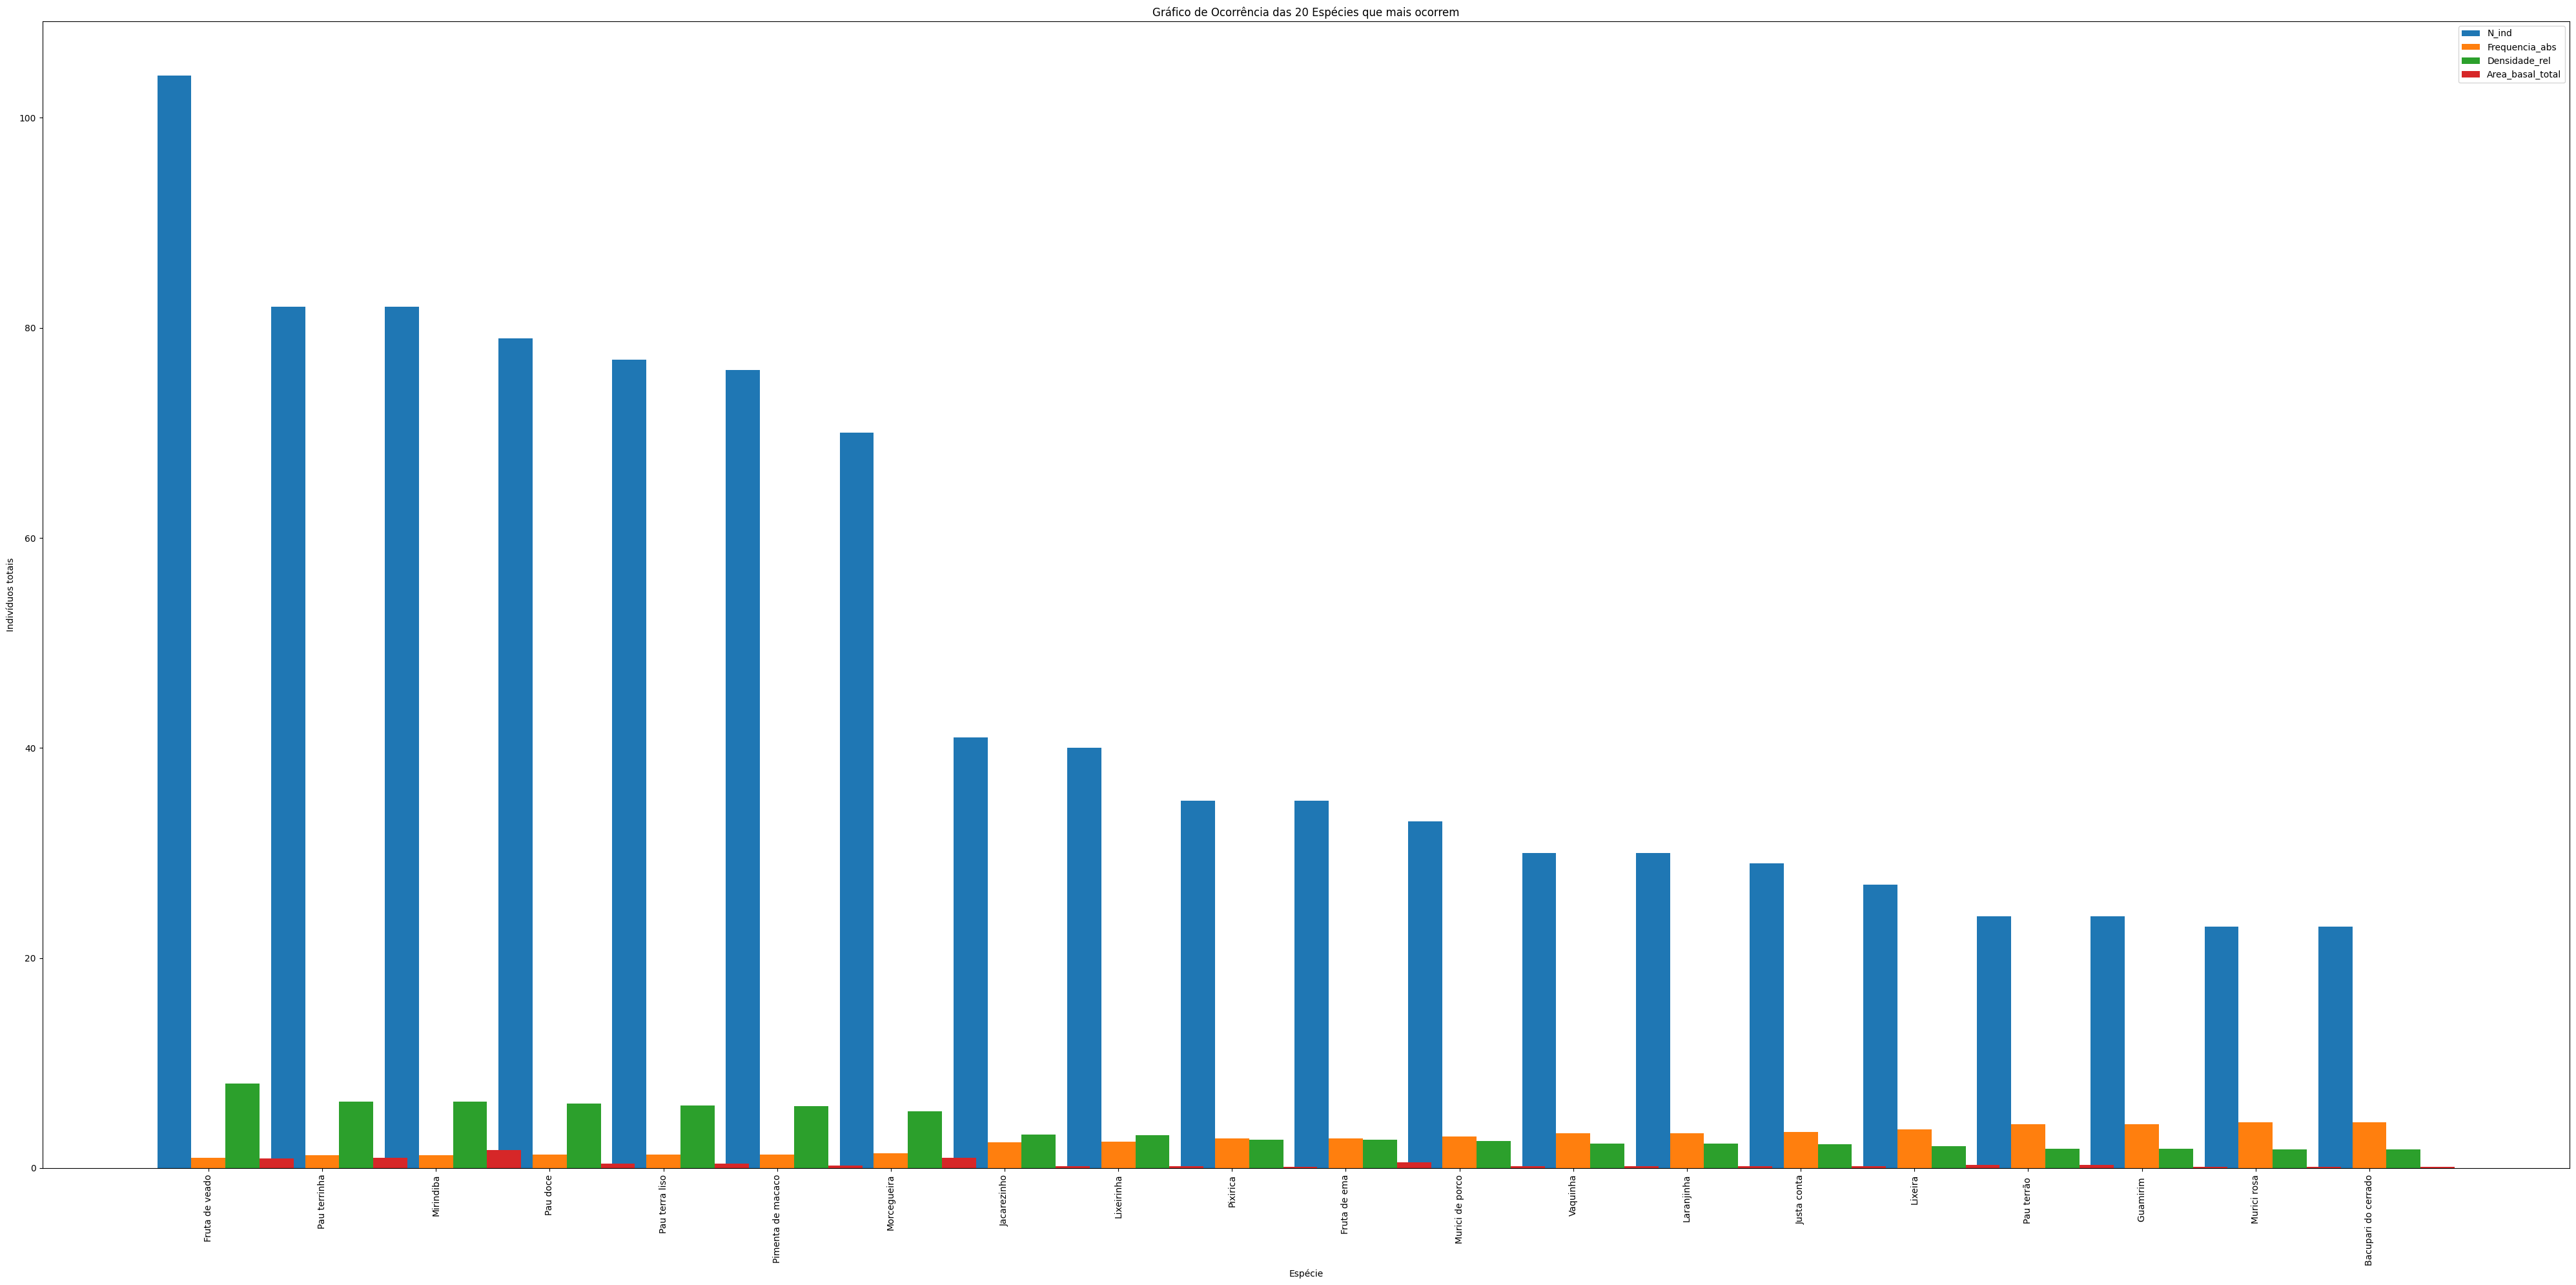

In [35]:
# Selecionar os 20 primeiros registros do DataFrame
top_20 = ocorrencia3.head(20)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(40, 20))
x = list(range(len(top_20)))  # Converter x para uma lista
width = 0.3

# Plotar as barras para cada coluna
ax.bar([val - width for val in x], top_20['N_ind'], width, label='N_ind')
ax.bar(x, top_20['Frequencia_abs'], width, label='Frequencia_abs')
ax.bar([val + width for val in x], top_20['Densidade_rel'], width, label='Densidade_rel')
ax.bar([val + 2*width for val in x], top_20['Area_basal_total'], width, label='Area_basal_total')

# Configurar os eixos e os rótulos
ax.set_xlabel('Espécie')
ax.set_ylabel('Indivíduos totais')
ax.set_title('Gráfico de Ocorrência das 20 Espécies que mais ocorrem')
ax.set_xticks(x)
ax.set_xticklabels(top_20['Nome_Popular'], rotation=90)

# Adicionar a legenda
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [36]:
plt.savefig('Grafico1.jpg', format='jpg')

<Figure size 640x480 with 0 Axes>